In [9]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup("https://www.worldometers.info/coronavirus/", 'html.parser')
soup = requests.get(url)
soup

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
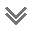

In [10]:
raw_data = soup.text
raw_data = BeautifulSoup(raw_data, "lxml")
raw_data

In [11]:
table_code = raw_data.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [12]:
tags = table_code.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [13]:
data = []
for tag in tags:
    y = tag.text.split('\n')
    if y[1] != "":
        data.append(y[1:])
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '107,248,397',
  '',
  '1,167,387                                ',
  '',
  '105,382,233',
  '',
  '698,777',
  '799',
  '320,331',
  '3,487',
  '1,180,622,285',
  '3,526,295',
  '334,805,269 ',
  'North America',
  '',
  '32870',
  '',
  '',
  '2,087',
  ''],
 ['2',
  'India',
  '44,993,579',
  '',
  '531,897                                ',
  '',
  '44,459,838',
  '',
  '1,844',
  'N/A',
  '31,987',
  '378',
  '930,797,975',
  '661,721',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6452',
  '',
  '',
  '1',
  ''],
 ['3',
  'France',
  '40,126,960',
  '',

In [14]:
import csv
file = open ('Covid_data.csv','w')
x = csv.writer(file)
x.writerows(data)
file.close()

In [1]:
import pandas as pd 
df = pd.read_csv('covid_data.csv', encoding = 'latin1', index_col='#')
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
#,,,,,,,,,,,,,,,,,,,,,
1,USA,"107,248,397",NaN,"1,167,387",NaN,"105,382,233",NaN,"698,777",799.0,"320,331",...,"3,526,295","334,805,269",North America,NaN,32870,NaN,NaN,"2,087",NaN,NaN
2,India,"44,993,579",NaN,"531,897",NaN,"44,459,838",NaN,"1,844",NaN,"31,987",...,"661,721","1,406,631,776",Asia,NaN,"312,6452",NaN,NaN,1,NaN,NaN
3,France,"40,126,960",NaN,"167,593",NaN,"39,919,002",NaN,"40,365",869.0,"611,836",...,"4,139,547","65,584,518",Europe,NaN,23910,NaN,NaN,615,NaN,NaN
4,Germany,"38,428,685",NaN,"174,352",NaN,"38,240,600",NaN,"13,733",NaN,"458,119",...,"1,458,359","83,883,596",Europe,NaN,24811,NaN,NaN,164,NaN,NaN
5,Brazil,"37,655,917",NaN,"703,719",NaN,"36,249,161",NaN,"703,037",NaN,"174,856",...,"296,146","215,353,593",South America,NaN,63063,NaN,NaN,"3,265",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,"36,295",...,NaN,799,Europe,NaN,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,"626,161",Africa,NaN,"62,616626,161",NaN,NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#removing the ','
country = df['Country,Other']
totalcase = df['TotalCases'].dropna()
totalrecovered = df['TotalRecovered'].dropna()
totalcase1 = list(map(lambda x:int(x.replace(',','')) , list(totalcase)))
totalrecovered1 = list(map(lambda x:int(x.replace(',','')) , list(totalrecovered)))

In [22]:
!pip install plotly==5.15.0

     -------------------------------------- 15.5/15.5 MB 255.6 kB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0


In [10]:
#visualising the data
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=country[0:10], y=totalcase1)])
fig.show()

In [19]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='TotalCases', x=country[0:10], y=totalcase1),
    go.Bar(name='TotalRecovered', x=country[0:10], y=totalrecovered1)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()